In [1]:
import os
import glob
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.applications import DenseNet121
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from keras.layers.wrappers import TimeDistributed
from keras.layers.core import Dense, Dropout, Flatten, Activation
from keras.layers.convolutional import Conv1D, MaxPooling1D,MaxPooling2D
from keras.layers.recurrent import LSTM,GRU
from keras.layers import Bidirectional
from keras.layers.pooling import GlobalAveragePooling1D
from keras.layers import Dropout
import matplotlib.pyplot as plt
stlf_data=pd.read_csv('C:\\Users\\Khalid\\Desktop\\stlf_github\\stlf_sim\\Data/05_May.csv')

In [2]:
stlf_data

,Temp,Hum,A,B,C,D,E,F,G,H,I,J,Cons
0,25.000000,35.000000,1,2,1,2580.0,2455.0,2410.0,2742.0,2967.0,2780.0,2503.083333,2542.0
1,24.833333,35.583333,1,2,1,2569.0,2491.0,2394.0,2722.0,2956.0,2770.0,2514.666667,2533.0
2,24.666667,36.166667,1,2,1,2570.0,2459.0,2433.0,2722.0,2945.0,2775.0,2523.416667,2538.0
3,24.500000,36.750000,1,2,1,2576.0,2534.0,2434.0,2733.0,2922.0,2790.0,2527.916667,2488.0
4,24.333333,37.333333,2,2,1,2542.0,2580.0,2455.0,2713.0,2896.0,2789.0,2533.833333,2526.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8923,34.192450,30.085943,23,6,1,3951.0,3911.0,3809.0,3959.0,3932.0,3833.0,3927.416667,3961.0
8924,34.192450,30.085943,24,6,1,3945.0,3938.0,3858.0,3970.0,3903.0,3766.0,3935.750000,3958.0
8925,34.192450,30.085943,24,6,1,3968.0,3940.0,3849.0,3955.0,3851.0,3754.0,3939.750000,3897.0
8926,33.190000,30.085943,24,6,1,3972.0,3935.0,3901.0,3896.0,3741.0,3683.0,3941.416667,3921.0


In [3]:
stlf_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8928 entries, 0 to 8927
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Temp    8928 non-null   float64
 1   Hum     8928 non-null   float64
 2   A       8928 non-null   int64  
 3   B       8928 non-null   int64  
 4   C       8928 non-null   int64  
 5   D       8928 non-null   float64
 6   E       8928 non-null   float64
 7   F       8928 non-null   float64
 8   G       8928 non-null   float64
 9   H       8928 non-null   float64
 10  I       8928 non-null   float64
 11  J       8928 non-null   float64
 12  Cons    8928 non-null   float64
dtypes: float64(10), int64(3)
memory usage: 906.9 KB


In [4]:
import numpy as np
stlf_data['A']=stlf_data['A'].astype(np.float64)
stlf_data['B']=stlf_data['B'].astype(np.float64)
stlf_data['C']=stlf_data['C'].astype(np.float64)

In [5]:
stlf_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8928 entries, 0 to 8927
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Temp    8928 non-null   float64
 1   Hum     8928 non-null   float64
 2   A       8928 non-null   float64
 3   B       8928 non-null   float64
 4   C       8928 non-null   float64
 5   D       8928 non-null   float64
 6   E       8928 non-null   float64
 7   F       8928 non-null   float64
 8   G       8928 non-null   float64
 9   H       8928 non-null   float64
 10  I       8928 non-null   float64
 11  J       8928 non-null   float64
 12  Cons    8928 non-null   float64
dtypes: float64(13)
memory usage: 906.9 KB


In [6]:
T = 11
HORIZON = 1


In [7]:
train = stlf_data.copy()[stlf_data.index <= 7392][['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = StandardScaler()
train[['Cons', 'Temp', 'Hum', 'A','B','C','D','E','F','G','H','I','J']] = scaler.fit_transform(train)
train.head()
#train.info()

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
0,-1.265577,-1.473924,-0.200042,-1.660902,-1.016087,0.632396,-1.154060,-1.517393,-1.647195,-0.637789,0.071547,-0.459631,-1.452229
1,-1.291801,-1.507662,-0.155244,-1.660902,-1.016087,0.632396,-1.186129,-1.412362,-1.693898,-0.696678,0.038496,-0.490385,-1.416623
2,-1.277232,-1.541400,-0.110446,-1.660902,-1.016087,0.632396,-1.183214,-1.505723,-1.580060,-0.696678,0.005444,-0.475008,-1.389726
3,-1.422922,-1.575138,-0.065648,-1.660902,-1.016087,0.632396,-1.165721,-1.286909,-1.577141,-0.664289,-0.063664,-0.428877,-1.375894
4,-1.312198,-1.608877,-0.020851,-1.516457,-1.016087,0.632396,-1.264846,-1.152703,-1.515843,-0.723178,-0.141786,-0.431952,-1.357706


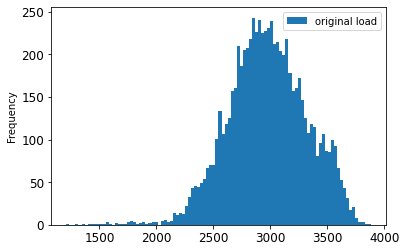

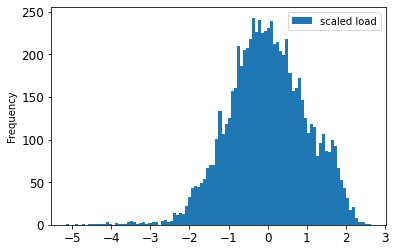

In [9]:
stlf_data[stlf_data.index <= 7392][['Cons']].rename(columns={'Cons':'original load'}).plot.hist(bins=100, fontsize=12)
train[train.index <= 7392][['Cons']].rename(columns={'Cons':'scaled load'}).plot.hist(bins=100, fontsize=12)
plt.show()

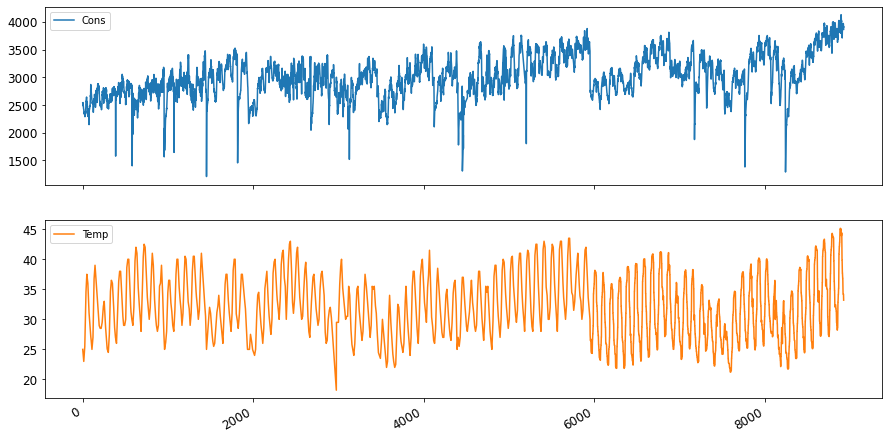

In [10]:
import matplotlib.pyplot as plt
stlf_data.plot(y=['Cons', 'Temp'], subplots=True, figsize=(15, 8), fontsize=12)
plt.show()

In [11]:
train_shifted = train.copy()
train_shifted=train_shifted.astype(np.float64)
train_shifted['y_t+100'] = train_shifted['Cons'].shift(-100)
train_shifted.head(10)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+100
0,-1.265577,-1.473924,-0.200042,-1.660902,-1.016087,0.632396,-1.154060,-1.517393,-1.647195,-0.637789,0.071547,-0.459631,-1.452229,-0.700299
1,-1.291801,-1.507662,-0.155244,-1.660902,-1.016087,0.632396,-1.186129,-1.412362,-1.693898,-0.696678,0.038496,-0.490385,-1.416623,-0.758575
2,-1.277232,-1.541400,-0.110446,-1.660902,-1.016087,0.632396,-1.183214,-1.505723,-1.580060,-0.696678,0.005444,-0.475008,-1.389726,-0.767316
3,-1.422922,-1.575138,-0.065648,-1.660902,-1.016087,0.632396,-1.165721,-1.286909,-1.577141,-0.664289,-0.063664,-0.428877,-1.375894,-0.886782
4,-1.312198,-1.608877,-0.020851,-1.516457,-1.016087,0.632396,-1.264846,-1.152703,-1.515843,-0.723178,-0.141786,-0.431952,-1.357706,-0.968369
5,-1.370474,-1.642615,0.023947,-1.516457,-1.016087,0.632396,-1.291085,-1.184795,-1.410761,-0.829177,-0.198876,-0.619551,-1.353864,-1.006248
6,-1.402526,-1.676353,0.068745,-1.516457,-1.016087,0.632396,-1.276508,-1.181878,-1.504167,-0.838011,-0.213899,-0.588797,-1.344642,-1.049956
7,-1.411267,-1.710091,0.113543,-1.516457,-1.016087,0.632396,-1.422279,-1.164373,-1.285247,-0.997010,-0.234932,-0.659531,-1.355401,-1.073266
8,-1.478285,-1.743830,0.158341,-1.372011,-1.016087,0.632396,-1.311493,-1.263569,-1.150976,-1.017621,-0.373148,-0.699512,-1.383835,-1.128628
9,-1.527819,-1.777568,0.203139,-1.372011,-1.016087,0.632396,-1.369801,-1.289826,-1.183084,-1.097121,-0.436247,-0.840980,-1.413805,-1.157766


In [12]:
for t in range(1, T+1):
    train_shifted['Cons_t-'+str(T-t)] = train_shifted['Cons'].shift(T-t)
train_shifted = train_shifted.rename(columns={'Cons':'Cons_original'})
train_shifted.head(10)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
0,-1.265577,-1.473924,-0.200042,-1.660902,-1.016087,0.632396,-1.154060,-1.517393,-1.647195,-0.637789,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.265577
1,-1.291801,-1.507662,-0.155244,-1.660902,-1.016087,0.632396,-1.186129,-1.412362,-1.693898,-0.696678,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.265577,-1.291801
2,-1.277232,-1.541400,-0.110446,-1.660902,-1.016087,0.632396,-1.183214,-1.505723,-1.580060,-0.696678,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.265577,-1.291801,-1.277232
3,-1.422922,-1.575138,-0.065648,-1.660902,-1.016087,0.632396,-1.165721,-1.286909,-1.577141,-0.664289,...,NaN,NaN,NaN,NaN,NaN,NaN,-1.265577,-1.291801,-1.277232,-1.422922
4,-1.312198,-1.608877,-0.020851,-1.516457,-1.016087,0.632396,-1.264846,-1.152703,-1.515843,-0.723178,...,NaN,NaN,NaN,NaN,NaN,-1.265577,-1.291801,-1.277232,-1.422922,-1.312198
5,-1.370474,-1.642615,0.023947,-1.516457,-1.016087,0.632396,-1.291085,-1.184795,-1.410761,-0.829177,...,NaN,NaN,NaN,NaN,-1.265577,-1.291801,-1.277232,-1.422922,-1.312198,-1.370474
6,-1.402526,-1.676353,0.068745,-1.516457,-1.016087,0.632396,-1.276508,-1.181878,-1.504167,-0.838011,...,NaN,NaN,NaN,-1.265577,-1.291801,-1.277232,-1.422922,-1.312198,-1.370474,-1.402526
7,-1.411267,-1.710091,0.113543,-1.516457,-1.016087,0.632396,-1.422279,-1.164373,-1.285247,-0.997010,...,NaN,NaN,-1.265577,-1.291801,-1.277232,-1.422922,-1.312198,-1.370474,-1.402526,-1.411267
8,-1.478285,-1.743830,0.158341,-1.372011,-1.016087,0.632396,-1.311493,-1.263569,-1.150976,-1.017621,...,NaN,-1.265577,-1.291801,-1.277232,-1.422922,-1.312198,-1.370474,-1.402526,-1.411267,-1.478285
9,-1.527819,-1.777568,0.203139,-1.372011,-1.016087,0.632396,-1.369801,-1.289826,-1.183084,-1.097121,...,-1.265577,-1.291801,-1.277232,-1.422922,-1.312198,-1.370474,-1.402526,-1.411267,-1.478285,-1.527819


In [13]:
# For debugging why val_loss gives NaN
train_shifted.tail(10)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
7383,0.890638,-1.060471,1.429629,1.372460,0.020113,0.632396,0.723477,0.635740,0.273465,1.438037,...,0.124308,0.631310,0.689586,0.727465,0.814879,0.721638,0.861500,0.779914,0.896466,0.890638
7384,0.890638,-1.060471,1.429629,1.516906,0.020113,0.632396,0.863418,0.694090,-0.018428,1.485148,...,0.631310,0.689586,0.727465,0.814879,0.721638,0.861500,0.779914,0.896466,0.890638,0.890638
7385,0.966397,-1.060471,1.429629,1.516906,0.020113,0.632396,0.781786,0.732018,0.054545,1.529315,...,0.689586,0.727465,0.814879,0.721638,0.861500,0.779914,0.896466,0.890638,0.890638,0.966397
7386,0.913949,-1.128285,1.466052,1.516906,0.020113,0.632396,0.898403,0.819544,0.130438,1.576426,...,0.727465,0.814879,0.721638,0.861500,0.779914,0.896466,0.890638,0.890638,0.966397,0.913949
7387,0.925604,-1.196099,1.502476,1.516906,0.020113,0.632396,0.892572,0.726183,0.638333,1.532259,...,0.814879,0.721638,0.861500,0.779914,0.896466,0.890638,0.890638,0.966397,0.913949,0.925604
7388,0.849845,-1.196099,1.502476,1.661352,0.020113,0.632396,0.892572,0.866224,0.696711,1.499870,...,0.721638,0.861500,0.779914,0.896466,0.890638,0.890638,0.966397,0.913949,0.925604,0.849845
7389,0.826535,-1.196099,1.502476,1.661352,0.020113,0.632396,0.968373,0.784534,0.734658,1.273149,...,0.861500,0.779914,0.896466,0.890638,0.890638,0.966397,0.913949,0.925604,0.849845,0.826535
7390,0.575947,-1.206221,1.502476,1.661352,0.020113,0.632396,0.915895,0.901235,0.822226,1.175983,...,0.779914,0.896466,0.890638,0.890638,0.966397,0.913949,0.925604,0.849845,0.826535,0.575947
7391,0.506016,-1.206221,1.449080,1.661352,0.020113,0.632396,0.927557,0.895400,0.728820,1.037594,...,0.896466,0.890638,0.890638,0.966397,0.913949,0.925604,0.849845,0.826535,0.575947,0.506016
7392,0.360326,-1.206221,1.449080,-1.660902,0.538213,0.632396,0.851756,0.895400,0.868929,1.022872,...,0.890638,0.890638,0.966397,0.913949,0.925604,0.849845,0.826535,0.575947,0.506016,0.360326


In [14]:
#One Nan value on 5699, filled with linear interpolation
train_shifted = train_shifted.dropna(how='any')

In [15]:
train_shifted.tail(10)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
7283,1.444261,-0.424843,0.147055,1.228014,-0.497987,0.632396,1.219100,0.717431,1.163741,-0.611289,...,0.733293,0.712896,0.520585,0.593430,0.791569,1.216984,1.193674,1.269433,1.385985,1.444261
7284,1.327709,-0.424843,0.147055,1.372460,-0.497987,0.632396,1.195777,0.524874,1.014875,-0.729067,...,0.712896,0.520585,0.593430,0.791569,1.216984,1.193674,1.269433,1.385985,1.444261,1.327709
7285,1.447175,-0.424843,0.147055,1.372460,-0.497987,0.632396,1.271578,0.597812,0.880604,-0.608345,...,0.520585,0.593430,0.791569,1.216984,1.193674,1.269433,1.385985,1.444261,1.327709,1.447175
7286,1.409295,-0.695087,0.535417,1.372460,-0.497987,0.632396,1.388195,0.796204,0.740495,-0.575956,...,0.593430,0.791569,1.216984,1.193674,1.269433,1.385985,1.444261,1.327709,1.447175,1.409295
7287,1.371416,-0.965330,0.923780,1.372460,-0.497987,0.632396,1.446504,1.222162,0.720063,-0.502345,...,0.791569,1.216984,1.193674,1.269433,1.385985,1.444261,1.327709,1.447175,1.409295,1.371416
7288,1.418037,-0.965330,0.923780,1.516906,-0.497987,0.632396,1.329886,1.198822,0.527413,-0.475845,...,1.216984,1.193674,1.269433,1.385985,1.444261,1.327709,1.447175,1.409295,1.371416,1.418037
7289,1.461744,-0.965330,0.923780,1.516906,-0.497987,0.632396,1.449419,1.274678,0.600386,-0.369846,...,1.193674,1.269433,1.385985,1.444261,1.327709,1.447175,1.409295,1.371416,1.418037,1.461744
7290,1.508365,-0.917759,0.781836,1.516906,-0.497987,0.632396,1.411518,1.391379,0.798874,-0.287401,...,1.269433,1.385985,1.444261,1.327709,1.447175,1.409295,1.371416,1.418037,1.461744,1.508365
7291,1.464658,-0.870188,0.639893,1.516906,-0.497987,0.632396,1.373618,1.449729,1.225039,-0.184346,...,1.385985,1.444261,1.327709,1.447175,1.409295,1.371416,1.418037,1.461744,1.508365,1.464658
7292,1.432606,-0.870188,0.639893,1.661352,-0.497987,0.632396,1.420265,1.333028,1.201687,-0.128402,...,1.444261,1.327709,1.447175,1.409295,1.371416,1.418037,1.461744,1.508365,1.464658,1.432606


In [16]:
y_train = train_shifted[['y_t+100']]
y_train


,y_t+100
10,-1.195646
11,-1.221870
12,-1.239353
13,-1.318026
14,-1.265577
...,...
7288,0.849845
7289,0.826535
7290,0.575947
7291,0.506016


In [17]:
X_train = train_shifted[['Cons_original','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
X_train


,Cons_original,Temp,Hum,A,B,C,D,E,F,G,H,I,J
10,-1.597751,-1.811306,0.247937,-1.372011,-1.016087,0.632396,-1.401871,-1.275239,-1.180165,-1.120676,-0.514369,-0.911714,-1.450180
11,-1.615234,-1.845044,0.292734,-1.372011,-1.016087,0.632396,-1.410617,-1.421115,-1.162652,-1.153065,-0.610519,-0.893261,-1.489629
12,-1.626889,-1.878782,0.337532,-1.227565,-1.016087,0.632396,-1.477672,-1.310249,-1.261895,-1.173676,-0.667608,-1.043956,-1.521393
13,-1.690993,-1.836610,0.273535,-1.227565,-1.016087,0.632396,-1.527235,-1.368599,-1.288166,-1.270843,-0.739721,-1.022428,-1.556486
14,-1.758010,-1.794437,0.209538,-1.227565,-1.016087,0.632396,-1.597205,-1.400692,-1.273571,-1.365064,-0.757749,-1.074710,-1.598753
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7288,1.418037,-0.965330,0.923780,1.516906,-0.497987,0.632396,1.329886,1.198822,0.527413,-0.475845,0.972956,1.001181,1.309689
7289,1.461744,-0.965330,0.923780,1.516906,-0.497987,0.632396,1.449419,1.274678,0.600386,-0.369846,1.066102,0.832035,1.386025
7290,1.508365,-0.917759,0.781836,1.516906,-0.497987,0.632396,1.411518,1.391379,0.798874,-0.287401,1.186290,1.022709,1.449041
7291,1.464658,-0.870188,0.639893,1.516906,-0.497987,0.632396,1.373618,1.449729,1.225039,-0.184346,1.207323,1.065765,1.470814


In [18]:
X_train=np.atleast_3d(X_train)
X_train.shape

(7283, 13, 1)

In [19]:
valid = stlf_data.copy()[(stlf_data.index >=7393) & (stlf_data.index <=8353)][['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
valid


,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
7393,3038.0,26.322450,56.473970,1.0,5.0,1.0,3260.0,3308.0,3244.0,3247.0,2761.0,3184.0,3227.500000
7394,2979.0,25.472451,59.436812,1.0,5.0,1.0,3174.0,3290.0,3284.0,3227.0,2766.0,3145.0,3202.083333
7395,2950.0,24.622452,62.399654,1.0,5.0,1.0,3150.0,3294.0,3282.0,3217.0,2771.0,3162.0,3174.416667
7396,2926.0,24.622452,62.399654,2.0,5.0,1.0,3100.0,3268.0,3282.0,3139.0,2753.0,3161.0,3144.750000
7397,2894.0,24.622452,62.399654,2.0,5.0,1.0,3038.0,3260.0,3308.0,3095.0,2773.0,3143.0,3110.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8349,3071.0,26.602451,54.397984,24.0,7.0,0.0,3190.0,3185.0,3122.0,2015.0,3482.0,3614.0,3173.333333
8350,3040.0,26.422451,54.397984,24.0,7.0,0.0,3204.0,3186.0,3151.0,2058.0,3398.0,3540.0,3164.083333
8351,3054.0,26.422451,53.836823,24.0,7.0,0.0,3211.0,3179.0,3163.0,2093.0,3349.0,3557.0,3155.000000
8352,3028.0,26.422451,53.836823,1.0,1.0,0.0,3186.0,3161.0,3193.0,2151.0,3288.0,3467.0,3141.250000


In [20]:
valid[['Cons', 'Temp', 'Hum', 'A','B','C','D','E','F','G','H','I','J']] = scaler.fit_transform(valid)
valid.head(10)


,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
7393,-0.009734,-0.674267,0.461222,-1.658081,0.207546,0.657412,0.537878,0.655023,0.495584,0.444914,-0.972872,0.239313,0.482493
7394,-0.155734,-0.850025,0.644150,-1.658081,0.207546,0.657412,0.325109,0.610514,0.594449,0.393514,-0.958920,0.132598,0.416115
7395,-0.227497,-1.025783,0.827077,-1.658081,0.207546,0.657412,0.265731,0.620405,0.589506,0.367814,-0.944969,0.179115,0.343861
7396,-0.286887,-1.025783,0.827077,-1.513750,0.207546,0.657412,0.142028,0.556114,0.589506,0.167353,-0.995194,0.176378,0.266383
7397,-0.366074,-1.025783,0.827077,-1.513750,0.207546,0.657412,-0.011364,0.536332,0.653769,0.054272,-0.939388,0.127125,0.176283
7398,-0.383396,-1.063003,0.864081,-1.513750,0.207546,0.657412,-0.157333,0.323678,0.609279,0.393514,-0.925437,0.192796,0.088577
7399,-0.472481,-1.100222,0.901086,-1.513750,0.207546,0.657412,-0.229081,0.264332,0.619166,0.439774,-0.914275,0.124389,-0.007834
7400,-0.556617,-1.100222,0.901086,-1.369419,0.207546,0.657412,-0.288459,0.140696,0.554903,0.370384,-0.992404,0.132598,-0.105986
7401,-0.608583,-1.100222,0.901086,-1.369419,0.207546,0.657412,-0.367629,-0.012613,0.535130,0.462904,-0.805453,0.140807,-0.206968
7402,-0.559092,-1.261506,1.050127,-1.369419,0.207546,0.657412,-0.384947,-0.158504,0.322569,0.326694,-0.741276,0.201005,-0.284880


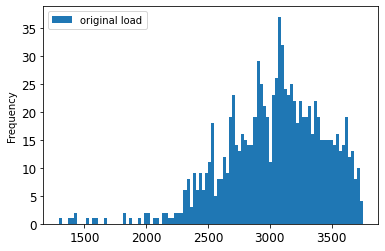

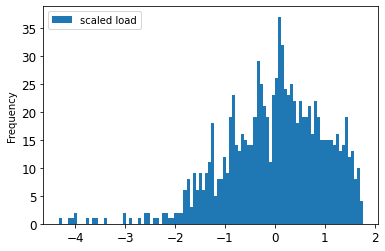

In [21]:
stlf_data[(stlf_data.index >=7393) & (stlf_data.index <=8353)][['Cons']].rename(columns={'Cons':'original load'}).plot.hist(bins=100, fontsize=12)
valid[(valid.index >=7393) & (valid.index <=8353)][['Cons']].rename(columns={'Cons':'scaled load'}).plot.hist(bins=100, fontsize=12)
plt.show()

In [22]:
valid_shifted = valid.copy()
valid_shifted=valid_shifted.astype(np.float64)
valid_shifted['y_t+100'] = valid_shifted['Cons'].shift(-100)
valid_shifted.head(10)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+100
7393,-0.009734,-0.674267,0.461222,-1.658081,0.207546,0.657412,0.537878,0.655023,0.495584,0.444914,-0.972872,0.239313,0.482493,0.017487
7394,-0.155734,-0.850025,0.644150,-1.658081,0.207546,0.657412,0.325109,0.610514,0.594449,0.393514,-0.958920,0.132598,0.416115,0.047182
7395,-0.227497,-1.025783,0.827077,-1.658081,0.207546,0.657412,0.265731,0.620405,0.589506,0.367814,-0.944969,0.179115,0.343861,0.019961
7396,-0.286887,-1.025783,0.827077,-1.513750,0.207546,0.657412,0.142028,0.556114,0.589506,0.167353,-0.995194,0.176378,0.266383,0.019961
7397,-0.366074,-1.025783,0.827077,-1.513750,0.207546,0.657412,-0.011364,0.536332,0.653769,0.054272,-0.939388,0.127125,0.176283,-0.039429
7398,-0.383396,-1.063003,0.864081,-1.513750,0.207546,0.657412,-0.157333,0.323678,0.609279,0.393514,-0.925437,0.192796,0.088577,-0.140887
7399,-0.472481,-1.100222,0.901086,-1.513750,0.207546,0.657412,-0.229081,0.264332,0.619166,0.439774,-0.914275,0.124389,-0.007834,-0.002310
7400,-0.556617,-1.100222,0.901086,-1.369419,0.207546,0.657412,-0.288459,0.140696,0.554903,0.370384,-0.992404,0.132598,-0.105986,0.022436
7401,-0.608583,-1.100222,0.901086,-1.369419,0.207546,0.657412,-0.367629,-0.012613,0.535130,0.462904,-0.805453,0.140807,-0.206968,-0.155734
7402,-0.559092,-1.261506,1.050127,-1.369419,0.207546,0.657412,-0.384947,-0.158504,0.322569,0.326694,-0.741276,0.201005,-0.284880,-0.262141


In [23]:
for t in range(1, T+1):
    valid_shifted['Cons_t-'+str(T-t)] = valid_shifted['Cons'].shift(T-t)
valid_shifted = valid_shifted.rename(columns={'Cons':'Cons_original'})
valid_shifted.head(10)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
7393,-0.009734,-0.674267,0.461222,-1.658081,0.207546,0.657412,0.537878,0.655023,0.495584,0.444914,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.009734
7394,-0.155734,-0.850025,0.644150,-1.658081,0.207546,0.657412,0.325109,0.610514,0.594449,0.393514,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.009734,-0.155734
7395,-0.227497,-1.025783,0.827077,-1.658081,0.207546,0.657412,0.265731,0.620405,0.589506,0.367814,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.009734,-0.155734,-0.227497
7396,-0.286887,-1.025783,0.827077,-1.513750,0.207546,0.657412,0.142028,0.556114,0.589506,0.167353,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.009734,-0.155734,-0.227497,-0.286887
7397,-0.366074,-1.025783,0.827077,-1.513750,0.207546,0.657412,-0.011364,0.536332,0.653769,0.054272,...,NaN,NaN,NaN,NaN,NaN,-0.009734,-0.155734,-0.227497,-0.286887,-0.366074
7398,-0.383396,-1.063003,0.864081,-1.513750,0.207546,0.657412,-0.157333,0.323678,0.609279,0.393514,...,NaN,NaN,NaN,NaN,-0.009734,-0.155734,-0.227497,-0.286887,-0.366074,-0.383396
7399,-0.472481,-1.100222,0.901086,-1.513750,0.207546,0.657412,-0.229081,0.264332,0.619166,0.439774,...,NaN,NaN,NaN,-0.009734,-0.155734,-0.227497,-0.286887,-0.366074,-0.383396,-0.472481
7400,-0.556617,-1.100222,0.901086,-1.369419,0.207546,0.657412,-0.288459,0.140696,0.554903,0.370384,...,NaN,NaN,-0.009734,-0.155734,-0.227497,-0.286887,-0.366074,-0.383396,-0.472481,-0.556617
7401,-0.608583,-1.100222,0.901086,-1.369419,0.207546,0.657412,-0.367629,-0.012613,0.535130,0.462904,...,NaN,-0.009734,-0.155734,-0.227497,-0.286887,-0.366074,-0.383396,-0.472481,-0.556617,-0.608583
7402,-0.559092,-1.261506,1.050127,-1.369419,0.207546,0.657412,-0.384947,-0.158504,0.322569,0.326694,...,-0.009734,-0.155734,-0.227497,-0.286887,-0.366074,-0.383396,-0.472481,-0.556617,-0.608583,-0.559092


In [24]:
valid_shifted = valid_shifted.dropna(how='any')

In [25]:
valid_shifted.tail(10)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
8244,-3.993817,-0.533661,1.081928,1.372873,0.716352,0.657412,0.151924,0.022005,0.396718,0.925506,...,0.081826,0.024911,-0.180480,-0.017157,0.210505,0.153589,0.081826,-0.289362,-1.712249,-3.993817
8245,-4.332835,-0.533661,1.081928,1.372873,0.716352,0.657412,0.080177,-0.183231,0.186628,0.997466,...,0.024911,-0.180480,-0.017157,0.210505,0.153589,0.081826,-0.289362,-1.712249,-3.993817,-4.332835
8246,-4.055682,-0.776621,1.307104,1.372873,0.716352,0.657412,-0.290933,-0.020031,0.097649,1.028306,...,-0.180480,-0.017157,0.210505,0.153589,0.081826,-0.289362,-1.712249,-3.993817,-4.332835,-4.055682
8247,-3.612731,-1.019580,1.532280,1.372873,0.716352,0.657412,-1.713519,0.207460,0.077876,0.953776,...,-0.017157,0.210505,0.153589,0.081826,-0.289362,-1.712249,-3.993817,-4.332835,-4.055682,-3.612731
8248,-3.397442,-1.019580,1.532280,1.517204,0.716352,0.657412,-3.994606,0.150587,0.021028,1.082277,...,0.210505,0.153589,0.081826,-0.289362,-1.712249,-3.993817,-4.332835,-4.055682,-3.612731,-3.397442
8249,-3.043576,-1.019580,1.532280,1.517204,0.716352,0.657412,-4.333553,0.078878,-0.184118,1.182507,...,0.153589,0.081826,-0.289362,-1.712249,-3.993817,-4.332835,-4.055682,-3.612731,-3.397442,-3.043576
8250,-2.714456,-1.051630,1.481613,1.517204,0.716352,0.657412,-4.056457,-0.292031,-0.020990,1.208207,...,0.081826,-0.289362,-1.712249,-3.993817,-4.332835,-4.055682,-3.612731,-3.397442,-3.043576,-2.714456
8251,-2.575879,-1.083680,1.430947,1.517204,0.716352,0.657412,-3.613600,-1.713850,0.206401,1.241617,...,-0.289362,-1.712249,-3.993817,-4.332835,-4.055682,-3.612731,-3.397442,-3.043576,-2.714456,-2.575879
8252,-2.511540,-1.083680,1.430947,1.661535,0.716352,0.657412,-3.398357,-3.993705,0.149554,1.138817,...,-1.712249,-3.993817,-4.332835,-4.055682,-3.612731,-3.397442,-3.043576,-2.714456,-2.575879,-2.511540
8253,-2.541235,-1.083680,1.430947,1.661535,0.716352,0.657412,-3.044566,-4.332469,0.077876,1.048867,...,-3.993817,-4.332835,-4.055682,-3.612731,-3.397442,-3.043576,-2.714456,-2.575879,-2.511540,-2.541235


In [26]:
y_valid = valid_shifted[['y_t+100']]
y_valid


,y_t+100
7403,-0.210175
7404,-0.168107
7405,-0.284413
7406,-0.363599
7407,-0.435362
...,...
8249,0.071928
8250,-0.004784
8251,0.029860
8252,-0.034479


In [27]:
X_valid = valid_shifted[['Cons_original','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
X_valid


,Cons_original,Temp,Hum,A,B,C,D,E,F,G,H,I,J
7403,-0.564041,-1.422790,1.199169,-1.369419,0.207546,0.657412,-0.474014,-0.230213,0.263249,0.408934,-0.718954,0.304984,-0.358005
7404,-0.620956,-1.422790,1.199169,-1.225087,0.207546,0.657412,-0.558132,-0.289559,0.139667,0.475754,-0.649196,-0.338045,-0.425254
7405,-0.690245,-1.422790,1.199169,-1.225087,0.207546,0.657412,-0.610087,-0.368686,-0.013575,0.390944,-0.721744,0.315929,-0.485103
7406,-0.729838,-1.461043,1.265111,-1.225087,0.207546,0.657412,-0.560606,-0.385995,-0.159402,0.365244,-0.727325,0.351501,-0.535593
7407,-0.695194,-1.499297,1.331052,-1.225087,0.207546,0.657412,-0.565554,-0.475013,-0.231079,0.442344,-0.679889,0.395282,-0.576726
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8249,-3.043576,-1.019580,1.532280,1.517204,0.716352,0.657412,-4.333553,0.078878,-0.184118,1.182507,1.694665,1.391293,-2.113649
8250,-2.714456,-1.051630,1.481613,1.517204,0.716352,0.657412,-4.056457,-0.292031,-0.020990,1.208207,1.691875,1.415919,-2.350869
8251,-2.575879,-1.083680,1.430947,1.517204,0.716352,0.657412,-3.613600,-1.713850,0.206401,1.241617,1.658391,1.377611,-2.595923
8252,-2.511540,-1.083680,1.430947,1.661535,0.716352,0.657412,-3.398357,-3.993705,0.149554,1.138817,1.644440,1.448755,-2.830314


In [28]:
X_valid=np.atleast_3d(X_valid)

print(X_valid.shape)

(851, 13, 1)


In [29]:
#from keras.layers import RepeatVector
batch_size = 300

model = models.Sequential()

model.add(LSTM(64, input_shape=(1,1)))
model.add(Dropout(0.2))
#model.add(Dropout(0.5))
#model.add(Dropout(0.5))
#model.add(Dropout(0.1))
#model.add(Flatten())
model.add(Dense(1))

In [30]:
from keras import optimizers
sgd = optimizers.Adam(lr=0.00001)
model.compile(sgd, loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 64)                16896     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
Total params: 16,961
Trainable params: 16,961
Non-trainable params: 0
_________________________________________________________________


In [31]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5)

In [32]:

history = model.fit(X_train,
          y_train,
          batch_size=250,
          epochs=300,verbose=1,
          validation_data=(X_valid, y_valid),callbacks=[earlystop],
          )


Epoch 1/300
30/30 [==============================] - 1s 49ms/step - loss: 1.0338 - val_loss: 1.1089
Epoch 2/300
30/30 [==============================] - 1s 24ms/step - loss: 1.0231 - val_loss: 1.1071
Epoch 3/300
30/30 [==============================] - 1s 22ms/step - loss: 1.0132 - val_loss: 1.1054
Epoch 4/300
30/30 [==============================] - 1s 23ms/step - loss: 1.0054 - val_loss: 1.1040
Epoch 5/300
30/30 [==============================] - 1s 23ms/step - loss: 0.9938 - val_loss: 1.1026
Epoch 6/300
30/30 [==============================] - 1s 22ms/step - loss: 0.9827 - val_loss: 1.1014
Epoch 7/300
30/30 [==============================] - 1s 22ms/step - loss: 0.9732 - val_loss: 1.1003
Epoch 8/300
30/30 [==============================] - 1s 22ms/step - loss: 0.9670 - val_loss: 1.0993
Epoch 9/300
30/30 [==============================] - 1s 22ms/step - loss: 0.9589 - val_loss: 1.0985
Epoch 10/300
30/30 [==============================] - 1s 24ms/step - loss: 0.9477 - val_loss: 1.0978

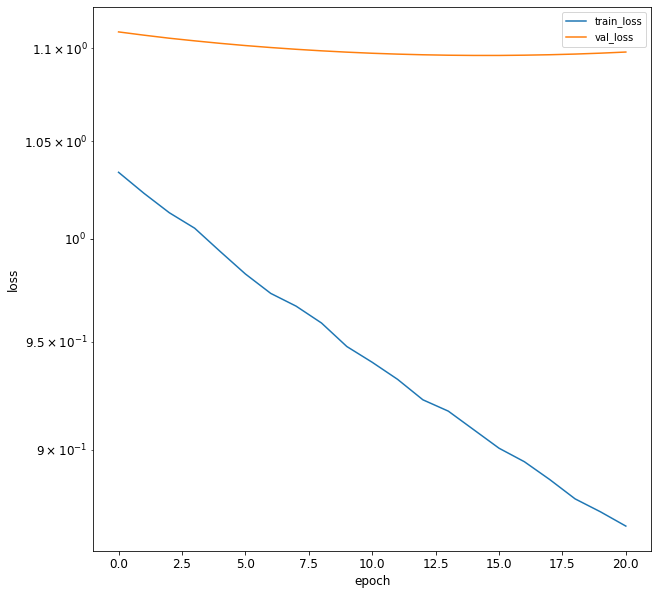

In [33]:
plot_df = pd.DataFrame.from_dict({'train_loss':history.history['loss'], 'val_loss':history.history['val_loss']})
plot_df.plot(logy=True, figsize=(10,10), fontsize=12)
plt.xlabel('epoch', fontsize=12)
plt.ylabel('loss', fontsize=12)
plt.show()



In [34]:
test = stlf_data.copy()[(stlf_data.index >= 8354) & (stlf_data.index<= 8565)][['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
test.head(20)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
8354,2943.0,25.687452,56.780377,1.0,1.0,0.0,3040.0,3204.0,3186.0,2170.0,3188.0,3383.0,3099.583333
8355,2937.0,24.952452,59.723930,1.0,1.0,0.0,3054.0,3211.0,3179.0,2202.0,3173.0,3381.0,3079.416667
8356,2893.0,24.952452,59.723930,2.0,1.0,0.0,3028.0,3186.0,3161.0,2222.0,3151.0,3347.0,3057.083333
8357,2899.0,24.952452,59.723930,2.0,1.0,0.0,2928.0,3071.0,3190.0,2240.0,3107.0,3311.0,3032.833333
8358,2928.0,24.757451,60.137898,2.0,1.0,0.0,2943.0,3040.0,3204.0,2249.0,3073.0,3363.0,3009.833333
8359,2916.0,24.562450,60.551865,2.0,1.0,0.0,2937.0,3054.0,3211.0,2261.0,2960.0,3289.0,2985.250000
8360,2891.0,24.562450,60.551865,3.0,1.0,0.0,2893.0,3028.0,3186.0,2297.0,2934.0,3202.0,2960.666667
8361,2920.0,24.562450,60.551865,3.0,1.0,0.0,2899.0,2928.0,3071.0,2329.0,2911.0,3082.0,2948.083333
8362,2918.0,24.052451,61.554868,3.0,1.0,0.0,2928.0,2943.0,3040.0,2382.0,2904.0,2909.0,2937.916667
8363,2924.0,23.542452,62.557870,3.0,1.0,0.0,2916.0,2937.0,3054.0,2416.0,2878.0,2659.0,2927.083333


In [35]:
from sklearn.preprocessing import MinMaxScaler
scaler = StandardScaler()
test[['Cons', 'Temp', 'Hum', 'A','B','C','D','E','F','G','H','I','J']] = scaler.fit_transform(test)
test.head(10)
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 212 entries, 8354 to 8565
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Cons    212 non-null    float64
 1   Temp    212 non-null    float64
 2   Hum     212 non-null    float64
 3   A       212 non-null    float64
 4   B       212 non-null    float64
 5   C       212 non-null    float64
 6   D       212 non-null    float64
 7   E       212 non-null    float64
 8   F       212 non-null    float64
 9   G       212 non-null    float64
 10  H       212 non-null    float64
 11  I       212 non-null    float64
 12  J       212 non-null    float64
dtypes: float64(13)
memory usage: 23.2 KB


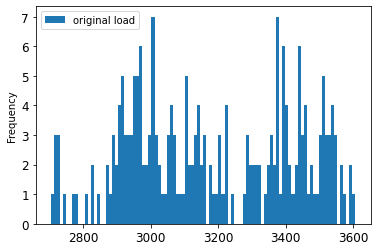

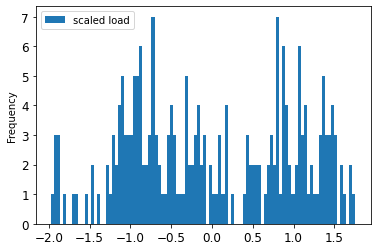

In [36]:
stlf_data[(stlf_data.index >= 8354) & (stlf_data.index <=8565)][['Cons']].rename(columns={'Cons':'original load'}).plot.hist(bins=100, fontsize=12)
test[(test.index >=8354) & (test.index <= 8565)][['Cons']].rename(columns={'Cons':'scaled load'}).plot.hist(bins=100, fontsize=12)
plt.show()

In [37]:
test_shifted = test.copy()
test_shifted=test_shifted.astype(np.float64)
test_shifted['y_t+100'] = test_shifted['Cons'].shift(-100)
test_shifted.head(10)


,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+100
8354,-0.986474,-1.035197,1.140073,-1.498364,-1.004934,-0.340279,-0.560681,0.137902,0.081297,-2.780206,0.925882,0.834676,-0.321397,-0.180481
8355,-1.011274,-1.164071,1.316386,-1.498364,-1.004934,-0.340279,-0.502903,0.167088,0.051843,-2.660613,0.888294,0.830566,-0.408236,-0.213547
8356,-1.193139,-1.164071,1.316386,-1.357685,-1.004934,-0.340279,-0.610204,0.062855,-0.023897,-2.585868,0.833166,0.760705,-0.504405,-0.321013
8357,-1.168340,-1.164071,1.316386,-1.357685,-1.004934,-0.340279,-1.022899,-0.416618,0.098128,-2.518596,0.722909,0.686735,-0.608827,-0.312747
8358,-1.048474,-1.198263,1.341182,-1.357685,-1.004934,-0.340279,-0.960994,-0.545867,0.157036,-2.484961,0.637711,0.793581,-0.707866,-0.197014
8359,-1.098073,-1.232454,1.365978,-1.357685,-1.004934,-0.340279,-0.985756,-0.487496,0.186490,-2.440113,0.354552,0.641531,-0.813724,-0.106082
8360,-1.201406,-1.232454,1.365978,-1.217006,-1.004934,-0.340279,-1.167342,-0.595899,0.081297,-2.305571,0.289400,0.462770,-0.919581,-0.089548
8361,-1.081540,-1.232454,1.365978,-1.217006,-1.004934,-0.340279,-1.142580,-1.012831,-0.402593,-2.185978,0.231766,0.216202,-0.973766,-0.217681
8362,-1.089807,-1.321876,1.426055,-1.217006,-1.004934,-0.340279,-1.022899,-0.950291,-0.533033,-1.987902,0.214225,-0.139266,-1.017544,-0.275547
8363,-1.065007,-1.411299,1.486133,-1.217006,-1.004934,-0.340279,-1.072422,-0.975307,-0.474125,-1.860834,0.149073,-0.652948,-1.064193,-0.135015


In [38]:
for t in range(1, T+1):
    test_shifted['Cons_t-'+str(T-t)] = test_shifted['Cons'].shift(T-t)
test_shifted = test_shifted.rename(columns={'Cons':'Cons_original'})
test_shifted.head(10)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
8354,-0.986474,-1.035197,1.140073,-1.498364,-1.004934,-0.340279,-0.560681,0.137902,0.081297,-2.780206,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.986474
8355,-1.011274,-1.164071,1.316386,-1.498364,-1.004934,-0.340279,-0.502903,0.167088,0.051843,-2.660613,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.986474,-1.011274
8356,-1.193139,-1.164071,1.316386,-1.357685,-1.004934,-0.340279,-0.610204,0.062855,-0.023897,-2.585868,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.986474,-1.011274,-1.193139
8357,-1.168340,-1.164071,1.316386,-1.357685,-1.004934,-0.340279,-1.022899,-0.416618,0.098128,-2.518596,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.986474,-1.011274,-1.193139,-1.168340
8358,-1.048474,-1.198263,1.341182,-1.357685,-1.004934,-0.340279,-0.960994,-0.545867,0.157036,-2.484961,...,NaN,NaN,NaN,NaN,NaN,-0.986474,-1.011274,-1.193139,-1.168340,-1.048474
8359,-1.098073,-1.232454,1.365978,-1.357685,-1.004934,-0.340279,-0.985756,-0.487496,0.186490,-2.440113,...,NaN,NaN,NaN,NaN,-0.986474,-1.011274,-1.193139,-1.168340,-1.048474,-1.098073
8360,-1.201406,-1.232454,1.365978,-1.217006,-1.004934,-0.340279,-1.167342,-0.595899,0.081297,-2.305571,...,NaN,NaN,NaN,-0.986474,-1.011274,-1.193139,-1.168340,-1.048474,-1.098073,-1.201406
8361,-1.081540,-1.232454,1.365978,-1.217006,-1.004934,-0.340279,-1.142580,-1.012831,-0.402593,-2.185978,...,NaN,NaN,-0.986474,-1.011274,-1.193139,-1.168340,-1.048474,-1.098073,-1.201406,-1.081540
8362,-1.089807,-1.321876,1.426055,-1.217006,-1.004934,-0.340279,-1.022899,-0.950291,-0.533033,-1.987902,...,NaN,-0.986474,-1.011274,-1.193139,-1.168340,-1.048474,-1.098073,-1.201406,-1.081540,-1.089807
8363,-1.065007,-1.411299,1.486133,-1.217006,-1.004934,-0.340279,-1.072422,-0.975307,-0.474125,-1.860834,...,-0.986474,-1.011274,-1.193139,-1.168340,-1.048474,-1.098073,-1.201406,-1.081540,-1.089807,-1.065007


In [39]:
test_shifted = test_shifted.dropna(how='any')
test_shifted.tail(5)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
8461,-0.217681,-1.146538,1.181487,-1.076327,0.516823,-0.340279,-0.288302,-0.308215,-0.166960,-0.081885,...,-0.296213,-0.349946,-0.180481,-0.213547,-0.321013,-0.312747,-0.197014,-0.106082,-0.089548,-0.217681
8462,-0.275547,-1.183359,1.283460,-1.076327,0.516823,-0.340279,-0.172748,-0.137273,-0.196414,-0.074411,...,-0.349946,-0.180481,-0.213547,-0.321013,-0.312747,-0.197014,-0.106082,-0.089548,-0.217681,-0.275547
8463,-0.135015,-1.220180,1.385432,-1.076327,0.516823,-0.340279,-0.081955,-0.170628,-0.217453,0.060132,...,-0.180481,-0.213547,-0.321013,-0.312747,-0.197014,-0.106082,-0.089548,-0.217681,-0.275547,-0.135015
8464,-0.147415,-1.220180,1.385432,-0.935648,0.516823,-0.340279,-0.065447,-0.279030,-0.238491,-0.025826,...,-0.213547,-0.321013,-0.312747,-0.197014,-0.106082,-0.089548,-0.217681,-0.275547,-0.135015,-0.147415
8465,-0.486345,-1.220180,1.385432,-0.935648,0.516823,-0.340279,-0.193382,-0.270691,-0.293192,-0.130470,...,-0.321013,-0.312747,-0.197014,-0.106082,-0.089548,-0.217681,-0.275547,-0.135015,-0.147415,-0.486345


In [40]:
y_test = test_shifted[['y_t+100']]
y_test

,y_t+100
8364,-0.147415
8365,-0.486345
8366,-0.527678
8367,-0.494612
8368,-0.726076
...,...
8461,0.890044
8462,0.728845
8463,0.534580
8464,0.555246


In [41]:
X_test = test_shifted[['Cons_original','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
X_test

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,H,I,J
8364,-1.085674,-1.411299,1.486133,-1.076327,-1.004934,-0.340279,-1.175596,-1.158758,-0.583526,-1.808512,0.176638,-0.784451,-1.103306
8365,-1.197273,-1.411299,1.486133,-1.076327,-1.004934,-0.340279,-1.055914,-1.133742,-1.004300,-1.860834,0.001229,-0.926227,-1.116225
8366,-1.189006,-1.418313,1.543818,-1.076327,-1.004934,-0.340279,-1.064168,-1.012831,-0.941184,-1.789825,-0.159144,-0.726919,-1.133808
8367,-1.040207,-1.425326,1.601503,-1.076327,-1.004934,-0.340279,-1.039406,-1.062863,-0.966430,-1.786088,-0.301977,-0.513227,-1.136319
8368,-1.135273,-1.425326,1.601503,-0.935648,-1.004934,-0.340279,-1.060041,-1.167096,-1.151570,-1.857097,-0.527502,-0.490625,-1.131296
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8461,-0.217681,-1.146538,1.181487,-1.076327,0.516823,-0.340279,-0.288302,-0.308215,-0.166960,-0.081885,-1.008622,-0.324192,-0.212310
8462,-0.275547,-1.183359,1.283460,-1.076327,0.516823,-0.340279,-0.172748,-0.137273,-0.196414,-0.074411,-0.961011,-0.455694,-0.214105
8463,-0.135015,-1.220180,1.385432,-1.076327,0.516823,-0.340279,-0.081955,-0.170628,-0.217453,0.060132,-0.958505,-0.572814,-0.201904
8464,-0.147415,-1.220180,1.385432,-0.935648,0.516823,-0.340279,-0.065447,-0.279030,-0.238491,-0.025826,-1.006116,-0.757740,-0.188986


In [42]:
X_test=np.atleast_3d(X_test)
X_test.shape

(102, 13, 1)

In [43]:
#subsequences=2
#X_test=X_test//subsequences
#X_test=X_test.reshape(1488,subsequences,12,1)
#print(X_test.shape)
X_test=X_test.reshape(102,13,1)

In [44]:
predictions = model.predict(X_test)
predictions

array([[-0.15785895],
       [-0.16962661],
       [-0.1649663 ],
       [-0.16492592],
       [-0.17494966],
       [-0.1792862 ],
       [-0.18066074],
       [-0.1805909 ],
       [-0.18196164],
       [-0.18550354],
       [-0.18457234],
       [-0.18378623],
       [-0.18544255],
       [-0.18962295],
       [-0.18638884],
       [-0.18537451],
       [-0.18287632],
       [-0.1829356 ],
       [-0.1755461 ],
       [-0.17335147],
       [-0.17059512],
       [-0.1686067 ],
       [-0.15788521],
       [-0.15001251],
       [-0.13890383],
       [-0.13071696],
       [-0.12326826],
       [-0.12145605],
       [-0.11378008],
       [-0.10567877],
       [-0.09092577],
       [-0.08039112],
       [-0.07673649],
       [-0.07729225],
       [-0.07609113],
       [-0.06731158],
       [-0.06387849],
       [-0.05827298],
       [-0.05184466],
       [-0.04322983],
       [-0.04119278],
       [-0.03929935],
       [-0.03992562],
       [-0.03729025],
       [-0.03068623],
       [-0

In [45]:
feature=stlf_data.copy()[(stlf_data.index >= 8354) & (stlf_data.index <=8565)][['Cons']]
#test_mean=cons.mean()
#test_mean
load_mean=feature.mean()
print(load_mean)
load_std=feature.std()
print(load_std)

Cons    3181.665094
dtype: float64
Cons    242.510089
dtype: float64


In [46]:
load_mean=3181.665094
load_std=242.510089
rescaled_target_load=(y_test*load_std)+load_mean
print(rescaled_target_load.shape)


(102, 1)


In [47]:
rescaled_predicted_load=(predictions*load_std)+load_mean
print(rescaled_predicted_load.shape)

(102, 1)


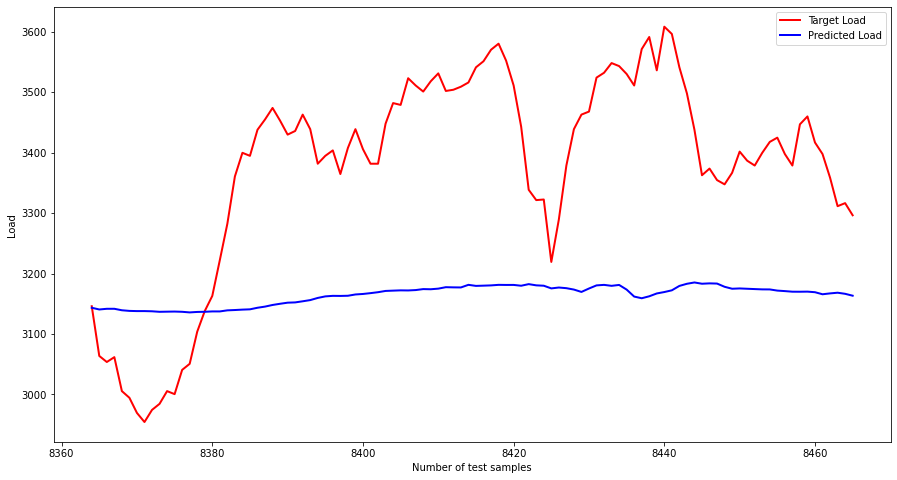

In [48]:
timestamp = y_test.index
plt.figure(figsize = (15,8))
plt.plot(timestamp,rescaled_target_load,label="Target Load",color='red', linestyle='solid',linewidth=2)

plt.plot(timestamp,rescaled_predicted_load,label="Predicted Load",color='blue', linestyle='solid',linewidth=2)

plt.xlabel('Number of test samples') 
plt.ylabel('Load') 
plt.legend()
plt.show()

In [49]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true),np.array(y_pred)

    ## Note: does not handle mix 1d representation
    #if _is_1d(y_true): 
    #    y_true, y_pred = _check_1d_array(y_true, y_pred)

    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

MAPE=mean_absolute_percentage_error(rescaled_target_load, rescaled_predicted_load)
print(MAPE)

7.057507784783852


In [50]:
MPE=np.mean((rescaled_target_load - rescaled_predicted_load) / rescaled_target_load) * 100
print(MPE)

y_t+100    5.967064
dtype: float64


In [51]:
PE=((rescaled_target_load - rescaled_predicted_load / rescaled_target_load)) * 100
APE=np.abs(PE)
print(APE)

            y_t+100
8364  314491.639028
8365  306269.643203
8366  305266.902851
8367  306069.065472
8368  300453.975516
...             ...
8461  339657.790592
8462  335747.432548
8463  331034.932323
8464  331536.315140
8465  329531.095323

[102 rows x 1 columns]


In [52]:
error = np.subtract(rescaled_target_load,rescaled_predicted_load)
sqerr=np.square(error)
print(sqerr)
MSE=sqerr.mean()
print(MSE)

           y_t+100
8364      6.416174
8365   5899.362351
8366   7737.155509
8367   6392.350619
8368  17863.341851
...            ...
8461  53747.970248
8462  36599.679643
8463  20467.567704
8464  22468.102167
8465  17679.678240

[102 rows x 1 columns]
y_t+100    68899.944206
dtype: float64


In [53]:
RMSE=MSE**0.5
print(RMSE)

y_t+100    262.487989
dtype: float64


In [54]:
a=np.array(rescaled_predicted_load)

In [55]:
for i in  range(0,102):
    b=a[i]
    print(b)

[3143.3826]
[3140.5288]
[3141.659]
[3141.669]
[3139.238]
[3138.1863]
[3137.853]
[3137.8699]
[3137.5376]
[3136.6785]
[3136.9043]
[3137.095]
[3136.6934]
[3135.6794]
[3136.4639]
[3136.71]
[3137.3157]
[3137.3013]
[3139.0933]
[3139.6255]
[3140.294]
[3140.7761]
[3143.3762]
[3145.2854]
[3147.9795]
[3149.9648]
[3151.7712]
[3152.2107]
[3154.0723]
[3156.0369]
[3159.6147]
[3162.1694]
[3163.0557]
[3162.921]
[3163.2122]
[3165.3413]
[3166.1738]
[3167.5332]
[3169.0923]
[3171.1814]
[3171.6753]
[3172.1345]
[3171.9827]
[3172.6218]
[3174.2234]
[3173.9634]
[3174.979]
[3177.378]
[3177.0798]
[3176.9397]
[3181.263]
[3179.5166]
[3179.9114]
[3180.3384]
[3181.235]
[3181.085]
[3181.1287]
[3179.772]
[3182.4207]
[3180.4226]
[3179.8032]
[3175.381]
[3176.8242]
[3175.7422]
[3173.4429]
[3169.5286]
[3175.1843]
[3180.3403]
[3181.1992]
[3179.6135]
[3181.0925]
[3173.392]
[3161.8687]
[3159.0847]
[3162.326]
[3167.0103]
[3169.3513]
[3172.2012]
[3179.4773]
[3183.0063]
[3185.1755]
[3183.0833]
[3183.6807]
[3183.362]
[3178.0425]